In [1]:
from eis.EISDataIO import eis_dataframe_from_csv, ECM_from_raw_strings
from eis.EISPlot import plot_eis

import numpy as np
import pandas as pd

import matplotlib.colors as colors
import matplotlib.cbook as cbook

from IPython.display import display

from os import path
import logging

In [14]:
pd.options.display.max_columns = None

In [3]:
# loading training data

# if you are on a windows machine un-comment the following line to get the path to training data
# here = !echo %cd%

# if you are on a mac/ unix machine un-comment the following line to get the path to training data
here = !pwd

train_data_path = path.join(path.dirname(here[0]), "train_data.csv")
eis_data = eis_dataframe_from_csv(train_data_path)

In [4]:
def complex_parts(cmp: pd.Series) -> tuple[pd.Series, pd.Series]:
    real_part= cmp.apply(np.real)
    imag_part= cmp.apply(np.imag)
    return (real_part, imag_part)

eis_data["Z_real"], eis_data["Z_imag"] = complex_parts(eis_data.Z)
display(eis_data)

,freq,Z,Circuit,Parameters,Z_real,Z_imag
0,"[0.1, 0.148398179, 0.220220195, 0.326802759, 0...","[(309.82561192-156.06088233j), (267.46983919-1...",L-R-RCPE-RCPE-RCPE,"L1: 2.94e-08, R1: 4.51e+00, R2: 5.19e-02, CPE1...","[309.82561192, 267.46983919, 229.38061493, 196...","[-156.06088233, -146.21033646, -133.4855237, -..."
1,"[1.0, 1.34339933, 1.80472177, 2.42446202, 3.25...","[(344.50700012-0.87321496j), (344.36191597-0.9...",RC-RC-RCPE-RCPE,"R1: 2.08e+02, R2: 2.50e+01, R3: 9.57e+01, R4: ...","[344.50700012, 344.36191597, 344.19647198, 344...","[-0.87321496, -0.99738889, -1.13909869, -1.300..."
2,"[1.0, 1.26360956, 1.59670912, 2.01761691, 2.54...","[(3080.15920083-80.84202473j), (3071.83539583-...",L-R-RCPE-RCPE-RCPE,"L1: 3.35e-08, R1: 6.95e+01, R2: 7.49e+01, CPE1...","[3080.15920083, 3071.83539583, 3061.93812951, ...","[-80.84202473, -94.50641483, -110.36642266, -1..."
3,"[10.0, 13.4990445, 18.2224203, 24.5985264, 33....","[(930.93345951-0.0068507146j), (930.93327153-0...",L-R-RCPE,"L1: 8.43e-07, R1: 9.06e+01, R2: 8.40e+02, CPE1...","[930.93345951, 930.93327153, 930.93302176, 930...","[-0.0068507146, -0.00910185162, -0.0120927041,..."
4,"[0.01, 0.0148907532, 0.0221734532, 0.033017942...","[(405.07355219-0.0149508921j), (405.07110253-0...",RCPE-RCPE-RCPE,"R1: 1.03e+01, R2: 6.71e-01, R3: 3.94e+02, CPE1...","[405.07355219, 405.07110253, 405.06786553, 405...","[-0.0149508921, -0.0197551995, -0.026103215, -..."
...,...,...,...,...,...,...
7457,"[10.0, 13.4596032, 18.1160919, 24.383541, 32.8...","[(4953.31225754-4814.61138816j), (4269.4031861...",RCPE-RCPE,"R1: 2.47e+01, R2: 2.95e+05, CPE1_t: 9.41e-01, ...","[4953.31225754, 4269.40318615, 3680.28615178, ...","[-4814.61138816, -4165.41666719, -3601.4380483..."
7458,"[10.0, 12.6485522, 15.9985872, 20.2358965, 25....","[(73538.51000223-1776.24017654j), (73413.60429...",L-R-RCPE-RCPE-RCPE,"L1: 1.05e-08, R1: 2.81e+01, R2: 6.40e+01, CPE1...","[73538.51000223, 73413.60429656, 73304.9395675...","[-1776.24017654, -1592.10621049, -1461.6962630..."
7459,"[1.0, 1.34453288, 1.80776868, 2.43060443, 3.26...","[(82.1093149-51.12982215j), (72.40330299-47.29...",RCPE-RCPE-RCPE,"R1: 4.78e+00, R2: 8.77e-01, R3: 2.85e+02, CPE1...","[82.1093149, 72.40330299, 63.66501847, 55.8809...","[-51.12982215, -47.29789889, -43.31241432, -39..."
7460,"[0.01, 0.0134051824, 0.0179698915, 0.024088967...","[(32.37740171-5.15196774e-05j), (32.37740063-6...",RCPE-RCPE,"R1: 5.65e+00, R2: 2.67e+01, CPE1_t: 9.21e-01, ...","[32.37740171, 32.37740063, 32.3773992, 32.3773...","[-5.15196774e-05, -6.82381469e-05, -9.03818659..."


In [5]:
from typing import Set
from itertools import chain

def freq_set(cmp: pd.Series) -> Set:
    result = set(chain.from_iterable(cmp))
    
    return result

len(freq_set(eis_data.freq))



2146

In [7]:
def freq_cat_choi(freq_array):
    bins = [
        0.01,
        10,
        10_000,
        100_000,
        2_000_000
    ]
    res=np.digitize(freq_array, bins, right=False)
    return res
    

In [8]:
def drange(cmp: pd.Series) -> tuple[pd.Series, pd.Series]:
    min_= cmp.apply(np.min)
    max_= cmp.apply(np.max)
    return (min_, max_)

eis_data["freq_min"], eis_data["freq_max"] = drange(eis_data.freq)
display(eis_data)

,freq,Z,Circuit,Parameters,Z_real,Z_imag,freq_min,freq_max
0,"[0.1, 0.148398179, 0.220220195, 0.326802759, 0...","[(309.82561192-156.06088233j), (267.46983919-1...",L-R-RCPE-RCPE-RCPE,"L1: 2.94e-08, R1: 4.51e+00, R2: 5.19e-02, CPE1...","[309.82561192, 267.46983919, 229.38061493, 196...","[-156.06088233, -146.21033646, -133.4855237, -...",0.10,100000.000
1,"[1.0, 1.34339933, 1.80472177, 2.42446202, 3.25...","[(344.50700012-0.87321496j), (344.36191597-0.9...",RC-RC-RCPE-RCPE,"R1: 2.08e+02, R2: 2.50e+01, R3: 9.57e+01, R4: ...","[344.50700012, 344.36191597, 344.19647198, 344...","[-0.87321496, -0.99738889, -1.13909869, -1.300...",1.00,100000.000
2,"[1.0, 1.26360956, 1.59670912, 2.01761691, 2.54...","[(3080.15920083-80.84202473j), (3071.83539583-...",L-R-RCPE-RCPE-RCPE,"L1: 3.35e-08, R1: 6.95e+01, R2: 7.49e+01, CPE1...","[3080.15920083, 3071.83539583, 3061.93812951, ...","[-80.84202473, -94.50641483, -110.36642266, -1...",1.00,1995262.310
3,"[10.0, 13.4990445, 18.2224203, 24.5985264, 33....","[(930.93345951-0.0068507146j), (930.93327153-0...",L-R-RCPE,"L1: 8.43e-07, R1: 9.06e+01, R2: 8.40e+02, CPE1...","[930.93345951, 930.93327153, 930.93302176, 930...","[-0.0068507146, -0.00910185162, -0.0120927041,...",10.00,199526.231
4,"[0.01, 0.0148907532, 0.0221734532, 0.033017942...","[(405.07355219-0.0149508921j), (405.07110253-0...",RCPE-RCPE-RCPE,"R1: 1.03e+01, R2: 6.71e-01, R3: 3.94e+02, CPE1...","[405.07355219, 405.07110253, 405.06786553, 405...","[-0.0149508921, -0.0197551995, -0.026103215, -...",0.01,1995262.310
...,...,...,...,...,...,...,...,...
7457,"[10.0, 13.4596032, 18.1160919, 24.383541, 32.8...","[(4953.31225754-4814.61138816j), (4269.4031861...",RCPE-RCPE,"R1: 2.47e+01, R2: 2.95e+05, CPE1_t: 9.41e-01, ...","[4953.31225754, 4269.40318615, 3680.28615178, ...","[-4814.61138816, -4165.41666719, -3601.4380483...",10.00,100000.000
7458,"[10.0, 12.6485522, 15.9985872, 20.2358965, 25....","[(73538.51000223-1776.24017654j), (73413.60429...",L-R-RCPE-RCPE-RCPE,"L1: 1.05e-08, R1: 2.81e+01, R2: 6.40e+01, CPE1...","[73538.51000223, 73413.60429656, 73304.9395675...","[-1776.24017654, -1592.10621049, -1461.6962630...",10.00,1000000.000
7459,"[1.0, 1.34453288, 1.80776868, 2.43060443, 3.26...","[(82.1093149-51.12982215j), (72.40330299-47.29...",RCPE-RCPE-RCPE,"R1: 4.78e+00, R2: 8.77e-01, R3: 2.85e+02, CPE1...","[82.1093149, 72.40330299, 63.66501847, 55.8809...","[-51.12982215, -47.29789889, -43.31241432, -39...",1.00,1995262.310
7460,"[0.01, 0.0134051824, 0.0179698915, 0.024088967...","[(32.37740171-5.15196774e-05j), (32.37740063-6...",RCPE-RCPE,"R1: 5.65e+00, R2: 2.67e+01, CPE1_t: 9.21e-01, ...","[32.37740171, 32.37740063, 32.3773992, 32.3773...","[-5.15196774e-05, -6.82381469e-05, -9.03818659...",0.01,100000.000


In [9]:


eis_data["Z_real_min"], eis_data["Z_real_max"] = drange(eis_data.Z_real)
eis_data["Z_imag_min"], eis_data["Z_imag_max"] = drange(eis_data.Z_imag)
display(eis_data)

,freq,Z,Circuit,Parameters,Z_real,Z_imag,freq_min,freq_max,Z_real_min,Z_real_max,Z_imag_min,Z_imag_max
0,"[0.1, 0.148398179, 0.220220195, 0.326802759, 0...","[(309.82561192-156.06088233j), (267.46983919-1...",L-R-RCPE-RCPE-RCPE,"L1: 2.94e-08, R1: 4.51e+00, R2: 5.19e-02, CPE1...","[309.82561192, 267.46983919, 229.38061493, 196...","[-156.06088233, -146.21033646, -133.4855237, -...",0.10,100000.000,4.802034,309.825612,-156.060882,-0.369196
1,"[1.0, 1.34339933, 1.80472177, 2.42446202, 3.25...","[(344.50700012-0.87321496j), (344.36191597-0.9...",RC-RC-RCPE-RCPE,"R1: 2.08e+02, R2: 2.50e+01, R3: 9.57e+01, R4: ...","[344.50700012, 344.36191597, 344.19647198, 344...","[-0.87321496, -0.99738889, -1.13909869, -1.300...",1.00,100000.000,230.202174,344.507000,-43.334151,-0.873215
2,"[1.0, 1.26360956, 1.59670912, 2.01761691, 2.54...","[(3080.15920083-80.84202473j), (3071.83539583-...",L-R-RCPE-RCPE-RCPE,"L1: 3.35e-08, R1: 6.95e+01, R2: 7.49e+01, CPE1...","[3080.15920083, 3071.83539583, 3061.93812951, ...","[-80.84202473, -94.50641483, -110.36642266, -1...",1.00,1995262.310,146.222822,3080.159201,-860.278825,-4.597264
3,"[10.0, 13.4990445, 18.2224203, 24.5985264, 33....","[(930.93345951-0.0068507146j), (930.93327153-0...",L-R-RCPE,"L1: 8.43e-07, R1: 9.06e+01, R2: 8.40e+02, CPE1...","[930.93345951, 930.93327153, 930.93302176, 930...","[-0.0068507146, -0.00910185162, -0.0120927041,...",10.00,199526.231,916.677733,930.933460,-78.835912,-0.006851
4,"[0.01, 0.0148907532, 0.0221734532, 0.033017942...","[(405.07355219-0.0149508921j), (405.07110253-0...",RCPE-RCPE-RCPE,"R1: 1.03e+01, R2: 6.71e-01, R3: 3.94e+02, CPE1...","[405.07355219, 405.07110253, 405.06786553, 405...","[-0.0149508921, -0.0197551995, -0.026103215, -...",0.01,1995262.310,17.754399,405.073552,-120.693060,-0.014951
...,...,...,...,...,...,...,...,...,...,...,...,...
7457,"[10.0, 13.4596032, 18.1160919, 24.383541, 32.8...","[(4953.31225754-4814.61138816j), (4269.4031861...",RCPE-RCPE,"R1: 2.47e+01, R2: 2.95e+05, CPE1_t: 9.41e-01, ...","[4953.31225754, 4269.40318615, 3680.28615178, ...","[-4814.61138816, -4165.41666719, -3601.4380483...",10.00,100000.000,72.555800,4953.312258,-4814.611388,-48.358524
7458,"[10.0, 12.6485522, 15.9985872, 20.2358965, 25....","[(73538.51000223-1776.24017654j), (73413.60429...",L-R-RCPE-RCPE-RCPE,"L1: 1.05e-08, R1: 2.81e+01, R2: 6.40e+01, CPE1...","[73538.51000223, 73413.60429656, 73304.9395675...","[-1776.24017654, -1592.10621049, -1461.6962630...",10.00,1000000.000,952.937485,73538.510002,-25026.297801,-1347.863875
7459,"[1.0, 1.34453288, 1.80776868, 2.43060443, 3.26...","[(82.1093149-51.12982215j), (72.40330299-47.29...",RCPE-RCPE-RCPE,"R1: 4.78e+00, R2: 8.77e-01, R3: 2.85e+02, CPE1...","[82.1093149, 72.40330299, 63.66501847, 55.8809...","[-51.12982215, -47.29789889, -43.31241432, -39...",1.00,1995262.310,5.685886,82.109315,-51.129822,-0.082206
7460,"[0.01, 0.0134051824, 0.0179698915, 0.024088967...","[(32.37740171-5.15196774e-05j), (32.37740063-6...",RCPE-RCPE,"R1: 5.65e+00, R2: 2.67e+01, CPE1_t: 9.21e-01, ...","[32.37740171, 32.37740063, 32.3773992, 32.3773...","[-5.15196774e-05, -6.82381469e-05, -9.03818659...",0.01,100000.000,6.077507,32.377402,-12.515715,-0.000052


In [10]:
def minmaxer(cmp: pd.Series, min_, max_) -> pd.Series:
    minmaxed = (cmp-min_)/(max_-min_)
    return minmaxed

Z_real_min = eis_data["Z_real_min"].min()
Z_real_max = eis_data["Z_real_max"].max()
Z_imag_min = eis_data["Z_imag_min"].min()
Z_imag_max = eis_data["Z_imag_max"].max()
eis_data["Z_real_minmaxed"] = minmaxer(eis_data.Z_real,Z_real_min,Z_real_max)
eis_data["Z_imag_minmaxed"] = minmaxer(eis_data.Z_imag,Z_imag_min,Z_imag_max)
display(eis_data)

,freq,Z,Circuit,Parameters,Z_real,Z_imag,freq_min,freq_max,Z_real_min,Z_real_max,Z_imag_min,Z_imag_max,Z_real_minmaxed,Z_imag_minmaxed
0,"[0.1, 0.148398179, 0.220220195, 0.326802759, 0...","[(309.82561192-156.06088233j), (267.46983919-1...",L-R-RCPE-RCPE-RCPE,"L1: 2.94e-08, R1: 4.51e+00, R2: 5.19e-02, CPE1...","[309.82561192, 267.46983919, 229.38061493, 196...","[-156.06088233, -146.21033646, -133.4855237, -...",0.10,100000.000,4.802034,309.825612,-156.060882,-0.369196,"[0.0024010756884318006, 0.002387371182141883, ...","[0.9964493638297757, 0.9964559871114435, 0.996..."
1,"[1.0, 1.34339933, 1.80472177, 2.42446202, 3.25...","[(344.50700012-0.87321496j), (344.36191597-0.9...",RC-RC-RCPE-RCPE,"R1: 2.08e+02, R2: 2.50e+01, R3: 9.57e+01, R4: ...","[344.50700012, 344.36191597, 344.19647198, 344...","[-0.87321496, -0.99738889, -1.13909869, -1.300...",1.00,100000.000,230.202174,344.507000,-43.334151,-0.873215,"[0.0024122970939710123, 0.002412250150980291, ...","[0.9965537084667062, 0.9965536249749967, 0.996..."
2,"[1.0, 1.26360956, 1.59670912, 2.01761691, 2.54...","[(3080.15920083-80.84202473j), (3071.83539583-...",L-R-RCPE-RCPE-RCPE,"L1: 3.35e-08, R1: 6.95e+01, R2: 7.49e+01, CPE1...","[3080.15920083, 3071.83539583, 3061.93812951, ...","[-80.84202473, -94.50641483, -110.36642266, -1...",1.00,1995262.310,146.222822,3080.159201,-860.278825,-4.597264,"[0.003297436482895553, 0.003294743257612999, 0...","[0.9964999392686594, 0.99649075164539, 0.99648..."
3,"[10.0, 13.4990445, 18.2224203, 24.5985264, 33....","[(930.93345951-0.0068507146j), (930.93327153-0...",L-R-RCPE,"L1: 8.43e-07, R1: 9.06e+01, R2: 8.40e+02, CPE1...","[930.93345951, 930.93327153, 930.93302176, 930...","[-0.0068507146, -0.00910185162, -0.0120927041,...",10.00,199526.231,916.677733,930.933460,-78.835912,-0.006851,"[0.0026020394734222194, 0.0026020394125999763,...","[0.9965542909902029, 0.9965542894765899, 0.996..."
4,"[0.01, 0.0148907532, 0.0221734532, 0.033017942...","[(405.07355219-0.0149508921j), (405.07110253-0...",RCPE-RCPE-RCPE,"R1: 1.03e+01, R2: 6.71e-01, R3: 3.94e+02, CPE1...","[405.07355219, 405.07110253, 405.06786553, 405...","[-0.0149508921, -0.0197551995, -0.026103215, -...",0.01,1995262.310,17.754399,405.073552,-120.693060,-0.014951,"[0.0024318938251909356, 0.002431893032586322, ...","[0.9965542855438289, 0.9965542823135225, 0.996..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7457,"[10.0, 13.4596032, 18.1160919, 24.383541, 32.8...","[(4953.31225754-4814.61138816j), (4269.4031861...",RCPE-RCPE,"R1: 2.47e+01, R2: 2.95e+05, CPE1_t: 9.41e-01, ...","[4953.31225754, 4269.40318615, 3680.28615178, ...","[-4814.61138816, -4165.41666719, -3601.4380483...",10.00,100000.000,72.555800,4953.312258,-4814.611388,-48.358524,"[0.003903508245800251, 0.003682224685933619, 0...","[0.9933170610547427, 0.9937535647319029, 0.994..."
7458,"[10.0, 12.6485522, 15.9985872, 20.2358965, 25....","[(73538.51000223-1776.24017654j), (73413.60429...",L-R-RCPE-RCPE-RCPE,"L1: 1.05e-08, R1: 2.81e+01, R2: 6.40e+01, CPE1...","[73538.51000223, 73413.60429656, 73304.9395675...","[-1776.24017654, -1592.10621049, -1461.6962630...",10.00,1000000.000,952.937485,73538.510002,-25026.297801,-1347.863875,"[0.02609472831582521, 0.026054314201793743, 0....","[0.9953599923411647, 0.9954837998070524, 0.995..."
7459,"[1.0, 1.34453288, 1.80776868, 2.43060443, 3.26...","[(82.1093149-51.12982215j), (72.40330299-47.29...",RCPE-RCPE-RCPE,"R1: 4.78e+00, R2: 8.77e-01, R3: 2.85e+02, CPE1...","[82.1093149, 72.40330299, 63.66501847, 55.8809...","[-51.12982215, -47.29789889, -43.31241432, -39...",1.00,1995262.310,5.685886,82.109315,-51.129822,-0.082206,"[0.002327396489029139, 0.0023242560410406555, ...","[0.9965199170738753, 0.9965224935714031, 0.996..."
7460,"[0.01, 0.0134051824, 0.0179698915, 0.024088967...","[(32.37740171-5.15196774e-05j), (32.37740063-6...",RCPE-RCPE,"R1: 5.65e+00, R2: 2.67e+01, CPE1_t: 9.21e-01, ...","[32.37740171, 32.37740063, 32.3773992, 32.3773...","[-5.15196774e-05, -6.82381469e-05,

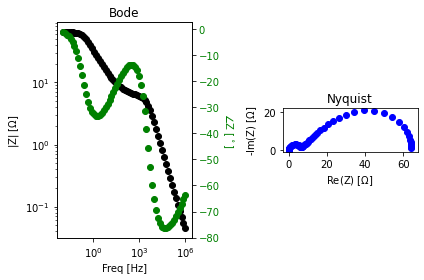

In [3]:
# plot data w/o circuit model
sample = eis_data.loc[eis_data.Circuit == "RC-G-G"].iloc[1]
frequencies = sample.freq
impedances = sample.Z
plot_eis(frequencies, impedances)

R1: 4.76e+01, C1: 3.61e-07, R_g1: 2.03e-05, t_g1: 2.97e-02, R_g2: 4.51e+00, t_g2: 5.41e+01


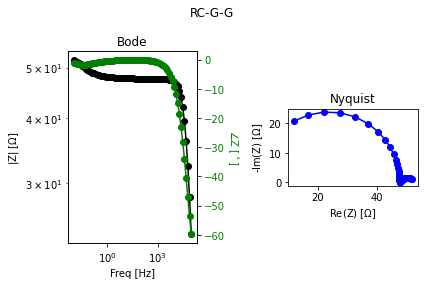

In [4]:
# plot data w/ circuit model
sample = eis_data.loc[eis_data.Circuit == "RC-G-G"].iloc[0]
frequencies = sample.freq
impedances = sample.Z
print(sample.Parameters)
circuit = ECM_from_raw_strings(sample.Circuit, sample.Parameters)
plot_eis(frequencies, impedances, ECM=circuit, title=sample.Circuit)

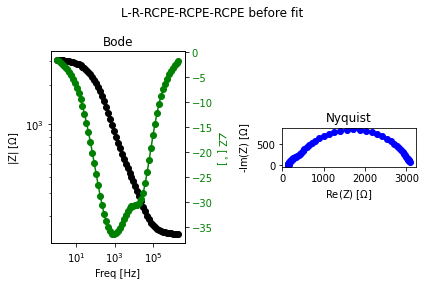

[('L1', 3.35e-08), ('R1', 69.5), ('R2', 74.9), ('CPE1_C', 4.62e-12), ('CPE1_t', 0.607), ('R3', 137.0), ('CPE2_C', 8.54e-07), ('CPE2_t', 0.943), ('R4', 2840.0), ('CPE3_C', 1.16e-05), ('CPE3_t', 0.692)]
[('L1', 0, inf), ('R1', 0, inf), ('R2', 0, inf), ('CPE1_C', 0, inf), ('CPE1_t', 0, 10), ('R3', 0, inf), ('CPE2_C', 0, inf), ('CPE2_t', 0, 10), ('R4', 0, inf), ('CPE3_C', 0, inf), ('CPE3_t', 0, 10)]


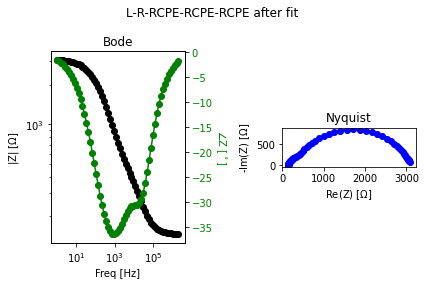

[('L1', 3.350116561085915e-08), ('R1', 69.5), ('R2', 74.9), ('CPE1_C', 1.7957971926724131e-10), ('CPE1_t', 0.607), ('R3', 137.0), ('CPE2_C', 8.551790186556203e-07), ('CPE2_t', 0.9430000000000681), ('R4', 2840.0), ('CPE3_C', 1.1612215531136277e-05), ('CPE3_t', 0.6920000000111881)]


In [5]:
# Demonstrate Optimizing a circuit model
sample = eis_data.loc[2, :]
frequencies = sample.freq
impedances = sample.Z
circuit = ECM_from_raw_strings(sample.Circuit, sample.Parameters)
plot_eis(frequencies, impedances, ECM=circuit, title=sample.Circuit + " before fit")
print([x for x in zip(circuit.param_names, circuit.param_values)])
print([x for x in zip(circuit.param_names, circuit.param_fitting_bounds[0], circuit.param_fitting_bounds[1])])
circuit.fit(frequencies, impedances)
plot_eis(frequencies, impedances, ECM=circuit, title=sample.Circuit + " after fit")
print([x for x in zip(circuit.param_names, circuit.param_values)])


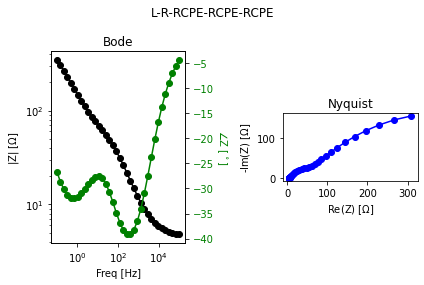

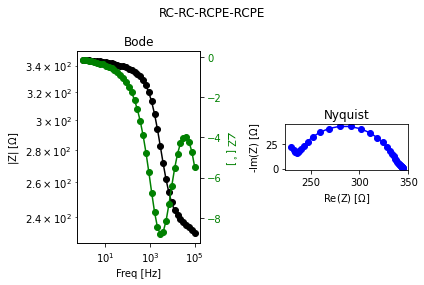

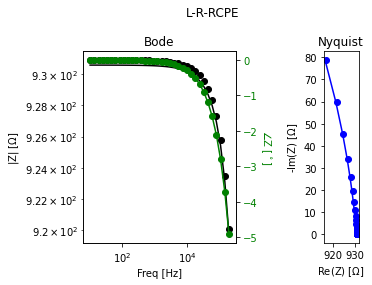

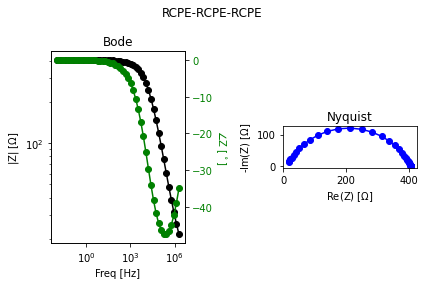

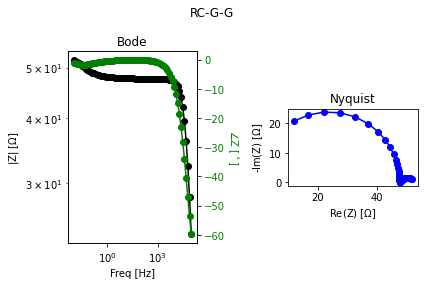

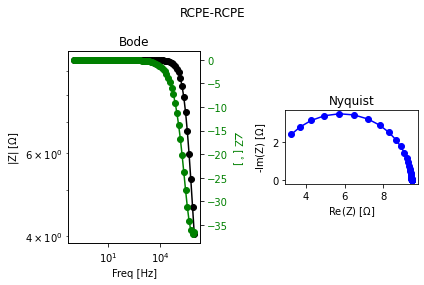

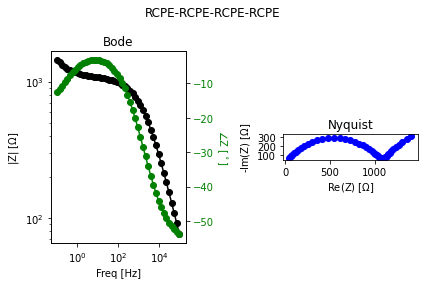

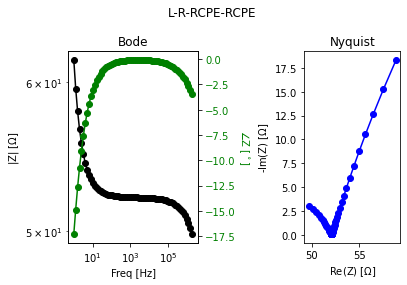

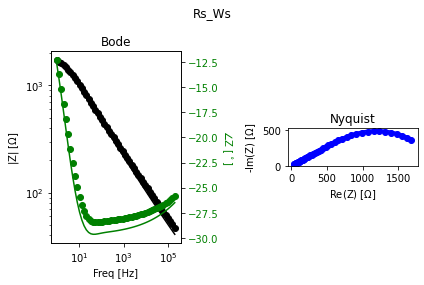

In [6]:
# Plot first example of each circuit type with the circuit model
for circuit_name in eis_data.Circuit.unique():
    try:
        sample = eis_data.loc[eis_data.Circuit == circuit_name].iloc[0]
        frequencies = sample.freq
        impedances = sample.Z
        circuit = ECM_from_raw_strings(sample.Circuit, sample.Parameters)
        plot_eis(frequencies, impedances, ECM=circuit, title=sample.Circuit)
    except:
        logging.exception(f"unable to simulate circuit: {circuit_name}")

In [22]:
pd.set_option('display.max_rows', 20)
#display(eis_data.groupby(["Circuit","freq_min", "freq_max"]).count())
#eis_data.groupby(["Circuit","freq_min", "freq_max"]).describe()
eis_data

,freq,Z,Circuit,Parameters,Z_real,Z_imag,freq_min,freq_max,Z_real_min,Z_real_max,Z_imag_min,Z_imag_max,Z_real_minmaxed,Z_imag_minmaxed
0,"[0.1, 0.148398179, 0.220220195, 0.326802759, 0...","[(309.82561192-156.06088233j), (267.46983919-1...",L-R-RCPE-RCPE-RCPE,"L1: 2.94e-08, R1: 4.51e+00, R2: 5.19e-02, CPE1...","[309.82561192, 267.46983919, 229.38061493, 196...","[-156.06088233, -146.21033646, -133.4855237, -...",0.10,100000.000,4.802034,309.825612,-156.060882,-0.369196,"[0.0024010756884318006, 0.002387371182141883, ...","[0.9964493638297757, 0.9964559871114435, 0.996..."
1,"[1.0, 1.34339933, 1.80472177, 2.42446202, 3.25...","[(344.50700012-0.87321496j), (344.36191597-0.9...",RC-RC-RCPE-RCPE,"R1: 2.08e+02, R2: 2.50e+01, R3: 9.57e+01, R4: ...","[344.50700012, 344.36191597, 344.19647198, 344...","[-0.87321496, -0.99738889, -1.13909869, -1.300...",1.00,100000.000,230.202174,344.507000,-43.334151,-0.873215,"[0.0024122970939710123, 0.002412250150980291, ...","[0.9965537084667062, 0.9965536249749967, 0.996..."
2,"[1.0, 1.26360956, 1.59670912, 2.01761691, 2.54...","[(3080.15920083-80.84202473j), (3071.83539583-...",L-R-RCPE-RCPE-RCPE,"L1: 3.35e-08, R1: 6.95e+01, R2: 7.49e+01, CPE1...","[3080.15920083, 3071.83539583, 3061.93812951, ...","[-80.84202473, -94.50641483, -110.36642266, -1...",1.00,1995262.310,146.222822,3080.159201,-860.278825,-4.597264,"[0.003297436482895553, 0.003294743257612999, 0...","[0.9964999392686594, 0.99649075164539, 0.99648..."
3,"[10.0, 13.4990445, 18.2224203, 24.5985264, 33....","[(930.93345951-0.0068507146j), (930.93327153-0...",L-R-RCPE,"L1: 8.43e-07, R1: 9.06e+01, R2: 8.40e+02, CPE1...","[930.93345951, 930.93327153, 930.93302176, 930...","[-0.0068507146, -0.00910185162, -0.0120927041,...",10.00,199526.231,916.677733,930.933460,-78.835912,-0.006851,"[0.0026020394734222194, 0.0026020394125999763,...","[0.9965542909902029, 0.9965542894765899, 0.996..."
4,"[0.01, 0.0148907532, 0.0221734532, 0.033017942...","[(405.07355219-0.0149508921j), (405.07110253-0...",RCPE-RCPE-RCPE,"R1: 1.03e+01, R2: 6.71e-01, R3: 3.94e+02, CPE1...","[405.07355219, 405.07110253, 405.06786553, 405...","[-0.0149508921, -0.0197551995, -0.026103215, -...",0.01,1995262.310,17.754399,405.073552,-120.693060,-0.014951,"[0.0024318938251909356, 0.002431893032586322, ...","[0.9965542855438289, 0.9965542823135225, 0.996..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7457,"[10.0, 13.4596032, 18.1160919, 24.383541, 32.8...","[(4953.31225754-4814.61138816j), (4269.4031861...",RCPE-RCPE,"R1: 2.47e+01, R2: 2.95e+05, CPE1_t: 9.41e-01, ...","[4953.31225754, 4269.40318615, 3680.28615178, ...","[-4814.61138816, -4165.41666719, -3601.4380483...",10.00,100000.000,72.555800,4953.312258,-4814.611388,-48.358524,"[0.003903508245800251, 0.003682224685933619, 0...","[0.9933170610547427, 0.9937535647319029, 0.994..."
7458,"[10.0, 12.6485522, 15.9985872, 20.2358965, 25....","[(73538.51000223-1776.24017654j), (73413.60429...",L-R-RCPE-RCPE-RCPE,"L1: 1.05e-08, R1: 2.81e+01, R2: 6.40e+01, CPE1...","[73538.51000223, 73413.60429656, 73304.9395675...","[-1776.24017654, -1592.10621049, -1461.6962630...",10.00,1000000.000,952.937485,73538.510002,-25026.297801,-1347.863875,"[0.02609472831582521, 0.026054314201793743, 0....","[0.9953599923411647, 0.9954837998070524, 0.995..."
7459,"[1.0, 1.34453288, 1.80776868, 2.43060443, 3.26...","[(82.1093149-51.12982215j), (72.40330299-47.29...",RCPE-RCPE-RCPE,"R1: 4.78e+00, R2: 8.77e-01, R3: 2.85e+02, CPE1...","[82.1093149, 72.40330299, 63.66501847, 55.8809...","[-51.12982215, -47.29789889, -43.31241432, -39...",1.00,1995262.310,5.685886,82.109315,-51.129822,-0.082206,"[0.002327396489029139, 0.0023242560410406555, ...","[0.9965199170738753, 0.9965224935714031, 0.996..."
7460,"[0.01, 0.0134051824, 0.0179698915, 0.024088967...","[(32.37740171-5.15196774e-05j), (32.37740063-6...",RCPE-RCPE,"R1: 5.65e+00, R2: 2.67e+01, CPE1_t: 9.21e-01, ...","[32.37740171, 32.37740063, 32.3773992, 32.3773...","[-5.15196774e-05, -6.82381469e-05,

In [ ]:


boxplot = df.boxplot(by='X')

In [12]:
# summary_cols=[min, max, len, np.std]
# freq_summary_cols=[]
# impedance_summary_cols=[]
# for s in summary_cols:
#     eis_data[f"freq_{s.__name__}"]=eis_data.freq.apply(s)
#     freq_summary_cols.append(f"freq_{s.__name__}")
#     eis_data[f"Z_real_{s.__name__}"]=eis_data.Z_real.apply(s)
#     eis_data[f"Z_imag_{s.__name__}"]=eis_data.Z_imag.apply(s)
#     impedance_summary_cols.append(f"Z_real_{s.__name__}")
#     impedance_summary_cols.append(f"Z_imag_{s.__name__}")

    

# display(eis_data[freq_summary_cols+impedance_summary_cols])
# display(eis_data[freq_summary_cols+impedance_summary_cols+["Circuit"]].groupby("Circuit").agg(["mean", "min", "max", "median", "std"]))

freq_min                                    freq_max  \
                         mean   min   max median       std           mean   
Circuit                                                                     
L-R-RCPE             2.837040  0.01  10.0    1.0  4.204125  795537.231188   
L-R-RCPE-RCPE        2.723100  0.01  10.0    1.0  4.147641  804542.293508   
L-R-RCPE-RCPE-RCPE   2.956678  0.01  10.0    1.0  4.284346  816653.041275   
RC-G-G               2.917101  0.01  10.0    1.0  4.262203  835811.225564   
RC-RC-RCPE-RCPE      2.501918  0.01  10.0    0.1  4.010040  836965.183820   
RCPE-RCPE            2.620000  0.01  10.0    0.1  4.111892  864079.647834   
RCPE-RCPE-RCPE       2.848770  0.01  10.0    1.0  4.223518  831957.208236   
RCPE-RCPE-RCPE-RCPE  2.820747  0.01  10.0    1.0  4.212725  863085.984872   
Rs_Ws                2.719110  0.01  10.0    0.1  4.175963  745816.396957   

                                                                        \
                          min         max        median            std   
Circuit                                                                  
L-R-RCPE             100000.0  1995262.31   199526.2310  752586.147505   
L-R-RCPE-RCPE        100000.0  1995262.31   199526.2310  752029.307093   
L-R-RCPE-RCPE-RCPE   100000.0  1995262.31   599763.1155  757647.728806   
RC-G-G               100000.0  1995262.31   199526.2310  779062.611229   
RC-RC-RCPE-RCPE      100000.0  1995262.31  1000000.0000  756245.725383   
RCPE-RCPE            100000.0  1995262.31  1000000.0000  776936.814505   
RCPE-RCPE-RCPE       100000.0  1995262.31  1000000.0000  764458.524251   
RCPE-RCPE-RCPE-RCPE  100000.0  1995262.31  1000000.0000  775633.476973   
Rs_Ws                100000.0  1995262.31   199526.2310  733319.730400   

                      freq_len                                 freq_std  \
                          mean min max median        std           mean   
Circuit                                                                   
L-R-RCPE             49.017341  24  83   48.0  14.745948  155586.196267   
L-R-RCPE-RCPE        49.248889  24  83   48.0  14.538134  157310.863684   
L-R-RCPE-RCPE-RCPE   49.280822  24  83   48.0  14.238335  159516.567101   
RC-G-G               48.596629  24  83   48.0  13.963966  164060.206980   
RC-RC-RCPE-RCPE      49.834620  24  83   49.0  14.348439  163246.527101   
RCPE-RCPE            49.364912  24  83   48.0  14.301707  169089.193929   
RCPE-RCPE-RCPE       48.759521  24  83   48.0  14.530557  162688.135243   
RCPE-RCPE-RCPE-RCPE  48.743506  24  83   48.0  13.998615  169106.650407   
Rs_Ws                49.202454  24  83   49.0  14.172415  145542.559307   

                                                                 \
                              min            max         median   
Circuit                                                           
L-R-RCPE             18322.710662  439981.672645   47718.864923   
L-R-RCPE-RCPE        18322.710662  439981.672645   47718.864923   
L-R-RCPE-RCPE-RCPE   18322.710662  439981.672645  110355.127272   
RC-G-G               18322.710662  439981.672645   47718.864923   
RC-RC-RCPE-RCPE      18322.710662  439981.672645  172991.389622   
RCPE-RCPE            18322.710662  439981.672645  172991.389622   
RCPE-RCPE-RCPE       18322.710662  439981.672645  172991.389622   
RCPE-RCPE-RCPE-RCPE  18322.710662  439981.672645  177455.656022   
Rs_Ws                18322.710662  439981.672645   44437.548450   

                                     Z_real_min                             \
                               std         mean          min           max   
Circuit                                                                      
L-R-RCPE             145772.205057  5796.075450    -0.781054  1.437388e+06   
L-R-RCPE-RCPE        145688.544724   472.129942     0.032657  1.413634e+04   
L-R-RCPE-RCPE-RCPE   145770.552846   473.165865     0.045939  1.469362e+04   
RC-G-G               151630.47275

In [105]:
import matplotlib.pyplot as plt
from sklearn import preprocessing


def plot_eis_nyquist(
    samples: pd.DataFrame,
    circuit_name: str,
):
    """ Creates a single figure w/ both Bode and Nyquist plots of a single EIS spectrum.
    Plots the results of a simulated circuit as well if provided

    Args:
        frequency (np.ndarray[Any, np.dtype[np.float_]]): numpy array of frequency values. Real, positive numbers
        impedance (np.ndarray[Any, np.dtype[np.complex_]]): numpy array of impedance values. Imaginary numbers
        title (Optional[str]): A figure title. Defaults to None.
        ECM (Optional[Circuit]) A Equivalent Circuit Model. Defaults to None.
    """
    assert len(samples) == 9, "samples must be a 9-row dataframe"
    fig, ax = plt.subplots(3, 3, squeeze=False, sharex=True, sharey=True)
    myplots=[]
    
    
    for a, tup in zip(ax.flat, samples.iterrows()):
        idx, s = tup
        freq: np.ndarray[Any, np.dtype[np.real_]] = s.freq
        impedance: np.ndarray[Any, np.dtype[np.complex_]] = s.Z
        a.plot(np.real(impedance), -np.imag(impedance), "bo")
        a.set_aspect("equal")
        a.title(f"freq: [{np.min(freq)}, {np.max(freq)}]")
        # a.set_xlabel(r"Re(Z) [$\Omega$]")
        # a.set_ylabel(r"-Im(Z) [$\Omega$]")

    fig.tight_layout()
    fig.suptitle(circuit_name)
    plt.yticks(color="g")
    plt.show()




In [132]:


def plot_eis_nyquist_minmaxed_local_global_freq(
    samples: pd.DataFrame,
    circuit_name: str,
):
    """ Creates a single figure w/ both Bode and Nyquist plots of a single EIS spectrum.
    Plots the results of a simulated circuit as well if provided

    Args:
        frequency (np.ndarray[Any, np.dtype[np.float_]]): numpy array of frequency values. Real, positive numbers
        impedance (np.ndarray[Any, np.dtype[np.complex_]]): numpy array of impedance values. Imaginary numbers
        title (Optional[str]): A figure title. Defaults to None.
        ECM (Optional[Circuit]) A Equivalent Circuit Model. Defaults to None.
    """
    assert len(samples) == 9, "samples must be a 9-row dataframe"
    fig, ax = plt.subplots(3, 3, squeeze=False, sharex=True, sharey=True)
    myplots=[]
    
    
    for a, tup in zip(ax.flat, samples.iterrows()):
        idx, s = tup
        freq: np.ndarray[Any, np.dtype[np.real_]] = s.freq
        impedance: np.ndarray[Any, np.dtype[np.complex_]] = s.Z
        freq_minmaxed= (freq-s.freq_min)/(s.freq_max-s.freq_min)
        real=np.real(impedance)
        imag=np.imag(impedance)
        real_minmaxed = (real-np.min(real))/(np.max(real)-np.min(real))
        imag_minmaxed = (imag-np.min(imag))/(np.max(imag)-np.min(imag))
        a.scatter(real_minmaxed, -imag_minmaxed,c=freq_minmaxed, cmap="viridis",norm=colors.LogNorm(vmin=s.freq_min, vmax=s.freq_max))
        a.set_aspect("equal")
        # a.title(f"freq: [{np.min(freq)}, {np.max(freq)}]")
        # a.set_xlabel(r"Re(Z) [$\Omega$]")
        # a.set_ylabel(r"-Im(Z) [$\Omega$]")

    fig.tight_layout()
    fig.suptitle(circuit_name)
    plt.yticks(color="g")
    plt.show()




In [152]:
def plot_eis_nyquist_minmaxed_local_local_freq(
    samples: pd.DataFrame,
    circuit_name: str,
):
    """ Creates a single figure w/ both Bode and Nyquist plots of a single EIS spectrum.
    Plots the results of a simulated circuit as well if provided

    Args:
        frequency (np.ndarray[Any, np.dtype[np.float_]]): numpy array of frequency values. Real, positive numbers
        impedance (np.ndarray[Any, np.dtype[np.complex_]]): numpy array of impedance values. Imaginary numbers
        title (Optional[str]): A figure title. Defaults to None.
        ECM (Optional[Circuit]) A Equivalent Circuit Model. Defaults to None.
    """
    assert len(samples) == 16, "samples must be a 9-row dataframe"
    fig, ax = plt.subplots(4, 4, squeeze=False, sharex=True, sharey=True)
    myplots=[]
    
    
    for a, tup in zip(ax.flat, samples.iterrows()):
        idx, s = tup
        freq: np.ndarray[Any, np.dtype[np.real_]] = s.freq
        impedance: np.ndarray[Any, np.dtype[np.complex_]] = s.Z
        # freq_minmaxed= (freq-np.min(freq))/(np.max(freq)-np.min(freq))
        real=np.real(impedance)
        imag=np.imag(impedance)
        real_minmaxed = (real-np.min(real))/(np.max(real)-np.min(real))
        imag_minmaxed = (imag-np.min(imag))/(np.max(imag)-np.min(imag))
        a.scatter(real_minmaxed, -imag_minmaxed,c=freq, cmap="viridis",norm=colors.LogNorm(vmin=s.freq_min, vmax=s.freq_max))
        a.set_aspect("equal")
        # a.title(f"freq: [{np.min(freq)}, {np.max(freq)}]")
        # a.set_xlabel(r"Re(Z) [$\Omega$]")
        # a.set_ylabel(r"-Im(Z) [$\Omega$]")

    fig.tight_layout()
    fig.suptitle(circuit_name)
    plt.yticks(color="g")
    plt.show()


In [165]:
def plot_eis_nyquist_local_freq(
    samples: pd.DataFrame,
    circuit_name: str,
):
    """ Creates a single figure w/ both Bode and Nyquist plots of a single EIS spectrum.
    Plots the results of a simulated circuit as well if provided

    Args:
        frequency (np.ndarray[Any, np.dtype[np.float_]]): numpy array of frequency values. Real, positive numbers
        impedance (np.ndarray[Any, np.dtype[np.complex_]]): numpy array of impedance values. Imaginary numbers
        title (Optional[str]): A figure title. Defaults to None.
        ECM (Optional[Circuit]) A Equivalent Circuit Model. Defaults to None.
    """
    assert len(samples) == 16, "samples must be a 9-row dataframe"
    fig, ax = plt.subplots(4, 4, squeeze=False, sharex=False, sharey=False)
    myplots=[]
    
    
    for a, tup in zip(ax.flat, samples.iterrows()):
        idx, s = tup
        freq: np.ndarray[Any, np.dtype[np.real_]] = s.freq
        impedance: np.ndarray[Any, np.dtype[np.complex_]] = s.Z
        # freq_minmaxed= (freq-np.min(freq))/(np.max(freq)-np.min(freq))
        real=np.real(impedance)
        imag=np.imag(impedance)
        real_minmaxed = real
        imag_minmaxed = imag
        a.scatter(real_minmaxed, -imag_minmaxed,c=freq_cat_choi(freq), cmap="viridis")
        # a.set_aspect("equal")
        # a.title(f"freq: [{np.min(freq)}, {np.max(freq)}]")
        # a.set_xlabel(r"Re(Z) [$\Omega$]")
        # a.set_ylabel(r"-Im(Z) [$\Omega$]")

    fig.tight_layout()
    fig.suptitle(circuit_name)
    plt.yticks(color="g")
    plt.show()

In [121]:

def plot_eis_nyquist_minmaxed_global(
    samples: pd.DataFrame,
    circuit_name: str,
):
    """ Creates a single figure w/ both Bode and Nyquist plots of a single EIS spectrum.
    Plots the results of a simulated circuit as well if provided

    Args:
        frequency (np.ndarray[Any, np.dtype[np.float_]]): numpy array of frequency values. Real, positive numbers
        impedance (np.ndarray[Any, np.dtype[np.complex_]]): numpy array of impedance values. Imaginary numbers
        title (Optional[str]): A figure title. Defaults to None.
        ECM (Optional[Circuit]) A Equivalent Circuit Model. Defaults to None.
    """
    assert len(samples) == 9, "samples must be a 9-row dataframe"
    fig, ax = plt.subplots(3, 3, squeeze=False, sharex=True, sharey=True)
    myplots=[]
    
    
    for a, tup in zip(ax.flat, samples.iterrows()):
        idx, s = tup
        freq: np.ndarray[Any, np.dtype[np.real_]] = s.freq
        a.scatter(s.Z_real_minmaxed, -s.Z_imag_minmaxed, c=freq, cmap="viridis")
        a.set_aspect("equal")
        # a.title(f"freq: [{np.min(freq)}, {np.max(freq)}]")
        # a.set_xlabel(r"Re(Z) [$\Omega$]")
        # a.set_ylabel(r"-Im(Z) [$\Omega$]")

    fig.tight_layout()
    fig.suptitle(circuit_name)
    plt.yticks(color="g")
    plt.show()




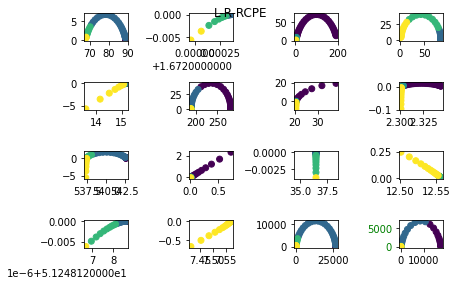

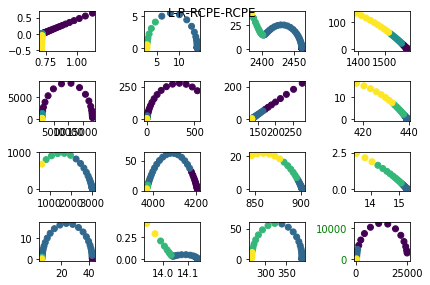

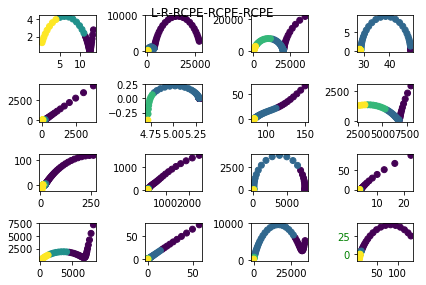

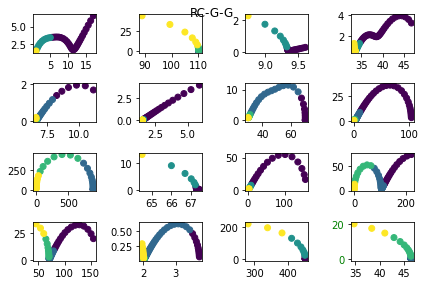

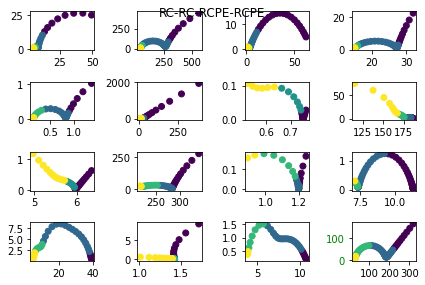

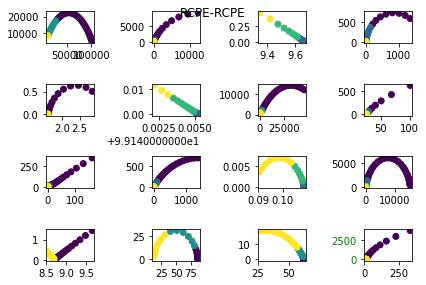

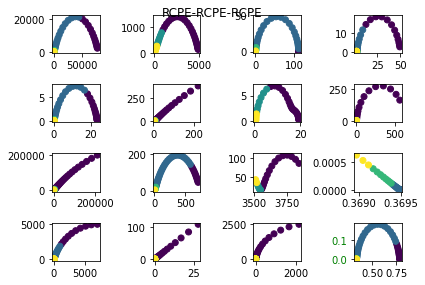

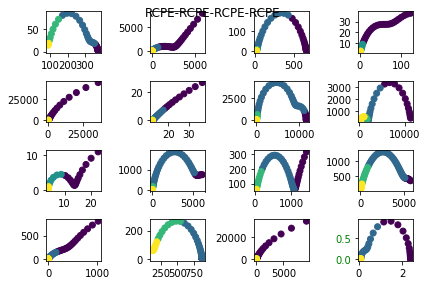

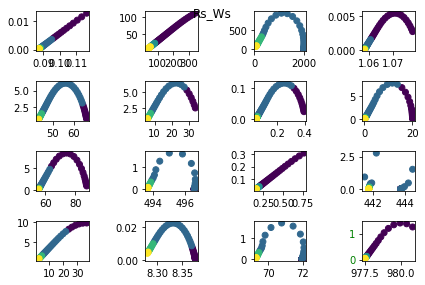

In [166]:
for n,g in eis_data.groupby("Circuit"):
    sample = g.sample(16)
    plot_eis_nyquist_local_freq(sample, n)

In [1]:
for n,g in eis_data.groupby("Circuit"):
    sample = g.sample(16)
    plot_eis_nyquist_local_freq(sample, n)

NameError: name 'eis_data' is not defined

In [55]:
def extract_freq_z_data(samples: pd.DataFrame) -> pd.DataFrame:
    frequencies = np.array([]) ; z_reals = np.array([]); z_imags = np.array([])
    for idx, s in samples.iterrows():
    
        freq = s.freq
        z_real = s.Z_real
        z_imag = s.Z_imag
        
        frequencies = np.concatenate((frequencies, freq), axis=None)
        z_reals = np.concatenate((z_reals, z_real), axis=None)
        z_imags = np.concatenate((z_imags, z_imag), axis=None)

        
    frame = { 'Freq': frequencies, 'Z_real': z_reals, 'Z_imag': z_imags }
    all_data = pd.DataFrame(frame)
    
    return all_data

In [56]:
extract_freq_z_data(eis_data)

,Freq,Z_real,Z_imag
0,0.100000,309.825612,-156.060882
1,0.148398,267.469839,-146.210336
2,0.220220,229.380615,-133.485524
3,0.326803,196.168815,-119.162289
4,0.484969,167.918745,-104.412341
...,...,...,...
366436,20153.376900,0.693812,-3.099571
366437,30078.825200,0.492535,-2.193738
366438,44892.512600,0.351077,-1.552448
366439,67001.875000,0.251471,-1.098535


<AxesSubplot:>

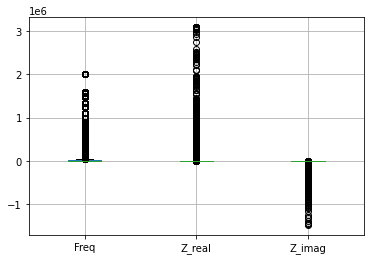

In [59]:
extract_freq_z_data(eis_data).boxplot()

In [36]:
eis_data["Z_real"]

0       [309.82561192, 267.46983919, 229.38061493, 196...
1       [344.50700012, 344.36191597, 344.19647198, 344...
2       [3080.15920083, 3071.83539583, 3061.93812951, ...
3       [930.93345951, 930.93327153, 930.93302176, 930...
4       [405.07355219, 405.07110253, 405.06786553, 405...
                              ...                        
7457    [4953.31225754, 4269.40318615, 3680.28615178, ...
7458    [73538.51000223, 73413.60429656, 73304.9395675...
7459    [82.1093149, 72.40330299, 63.66501847, 55.8809...
7460    [32.37740171, 32.37740063, 32.3773992, 32.3773...
7461    [794.89205, 687.848409, 554.323587, 412.204765...
Name: Z_real, Length: 7462, dtype: object